# Tratamento da tabela predict

## Instalando e importando bibliotecas

In [194]:
!pip install pandas pyarrow numpy


[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [210]:
import pandas as pd
import pyarrow
import matplotlib.pyplot as plt
import numpy as np
import requests
import io
import re

# Importando dataset

In [196]:
df_falhas_predict = pd.read_csv("../../data/csv/FALHAS_PREDICT.csv")

In [197]:
df_falhas_predict.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,82662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,KNR,MODELO,COR,MOTOR,ESTACAO,USUARIO,HALLE,FALHA,DATA
2,NaN,2023-1326197,T-CROSS,0Q0Q,DHS,PCEQS100,2043521,ZP5,Porta dianteira Folga (Ajuste),9/1/2023 22:01:44
3,NaN,2023-1326197,T-CROSS,0Q0Q,DHS,PCEQS100,2043521,ZP5,Porta traseira Folga (Ajuste),9/1/2023 22:01:03
4,NaN,2023-4130482,AUDI Q3,2Y2Y,DSN,PCEQS999,2054701,ESPC,Lanterna tras (09) Interfere,10/1/2023 09:01:25


In [198]:
df_falhas_predict.drop(columns = 'Unnamed: 0', inplace=True)

In [199]:
df_falhas_predict.columns = df_falhas_predict.iloc[1]
df_falhas_predict.drop([0,1], axis = 0, inplace=True)

In [200]:
columns = df_falhas_predict.columns.tolist()
print("Columns:", columns)

Columns: ['KNR', 'MODELO', 'COR', 'MOTOR', 'ESTACAO', 'USUARIO', 'HALLE', 'FALHA', 'DATA']


In [201]:
df_falhas_predict.head()

1,KNR,MODELO,COR,MOTOR,ESTACAO,USUARIO,HALLE,FALHA,DATA
2,2023-1326197,T-CROSS,0Q0Q,DHS,PCEQS100,2043521,ZP5,Porta dianteira Folga (Ajuste),9/1/2023 22:01:44
3,2023-1326197,T-CROSS,0Q0Q,DHS,PCEQS100,2043521,ZP5,Porta traseira Folga (Ajuste),9/1/2023 22:01:03
4,2023-4130482,AUDI Q3,2Y2Y,DSN,PCEQS999,2054701,ESPC,Lanterna tras (09) Interfere,10/1/2023 09:01:25
5,2023-4130482,AUDI Q3,2Y2Y,DSN,PCEQS999,2054701,ESPC,Emblema / logo - Adesivos em geral Solto(a) ¨,10/1/2023 09:01:41
6,2023-4130664,AUDI Q3,6Y6Y,DSN,PCEQS805,7000240,ZP82,Painel instrumentos Ruído (-),10/1/2023 11:01:56


In [202]:
df_falhas_predict.drop(columns='MODELO', inplace=True)

In [203]:
df_falhas_predict.drop_duplicates(inplace=True)

In [204]:
df_falhas_predict['FALHA'].value_counts()

FALHA
Painel lateral Sujeira na pintura                      30576
Painel lateral 04. Caroço / Pico                       21489
Painel lateral 01. Amassado                            11033
Paralama dianteiro 04. Caroço / Pico                   10986
Tampa dianteira Sujeira na pintura                     10888
                                                       ...  
Número do chassi nos vidros Desalinhado (a)                1
Tubo escape dianteiro Ruído de acionamento                 1
Módulo do vidro traseiro - Chicote Danificado (a) ¨        1
Pino tucker 120 Falta ¨                                    1
MOTOR RUÍDO (-)                                            1
Name: count, Length: 6194, dtype: int64

In [205]:
df_falhas_predict['FALHA'] = df_falhas_predict['FALHA'].str.upper()

In [212]:
df_falhas_predict.head()

1,KNR,COR,MOTOR,ESTACAO,USUARIO,HALLE,FALHA,DATA
2,2023-1326197,0Q0Q,DHS,PCEQS100,2043521,ZP5,PORTA DIANTEIRA FOLGA (AJUSTE),9/1/2023 22:01:44
3,2023-1326197,0Q0Q,DHS,PCEQS100,2043521,ZP5,PORTA TRASEIRA FOLGA (AJUSTE),9/1/2023 22:01:03
4,2023-4130482,2Y2Y,DSN,PCEQS999,2054701,ESPC,LANTERNA TRAS (09) INTERFERE,10/1/2023 09:01:25
5,2023-4130482,2Y2Y,DSN,PCEQS999,2054701,ESPC,EMBLEMA / LOGO - ADESIVOS EM GERAL SOLTO(A) ¨,10/1/2023 09:01:41
6,2023-4130664,6Y6Y,DSN,PCEQS805,7000240,ZP82,PAINEL INSTRUMENTOS RUÍDO (-),10/1/2023 11:01:56


In [222]:
# É necessário fazer essa separação da Falha ??? Vai dar erro pq nao segue um padrão de espaços
# df_falhas_predict[['PEÇA', 'FALHA_PEÇA']] = df_falhas_predict['FALHA'].str.split(' ', expand=True, n=2).iloc[:, :4]
df_falhas_predict[['PEÇA', 'FALHA_PEÇA']] = df_falhas_predict['FALHA'].str.extract(r'(\w+\s\w+)\s(.+)')

AttributeError: module 'numpy' has no attribute 'matrix'

In [224]:
df_falhas_predict['MOTOR'].value_counts()

MOTOR
DHS    423663
CWL    169596
CWS     40191
DRP     24140
DSN      3217
            1
Name: count, dtype: int64

In [225]:
df_falhas_predict['HALLE'].unique()

array(['ZP5', 'ESPC', 'ZP82', 'Q3RE', 'ZP7', 'ROD', 'ZP5A', 'ZP6', nan,
       'ZP8', 'AGUA', 'BUY', 'PROC', 'ZP61', 'ZP62', 'CAB', 'INTE',
       'ZP8R', 'ZP6Q', 'DKA', 'RUID', 'ZP7 ', 'ZP6 ', 'TLUI', 'PVC',
       'ZP5 ', '    ', 'PROF', 'PVC ', 'ROD ', 'BUY ', 'ZP8 ', 'CAB ',
       'DKA '], dtype=object)

In [226]:
df_falhas_predict['HALLE'] = df_falhas_predict['HALLE'].str.split(' ').str[0]

In [228]:
data_types = df_falhas_predict.dtypes
print("Data Types:\n", data_types)

Data Types:
 1
KNR        object
COR        object
MOTOR      object
ESTACAO    object
USUARIO    object
HALLE      object
FALHA      object
DATA       object
dtype: object


In [229]:
count_starts_with_2024 = df_falhas_predict['KNR'].str.startswith('2024').sum()

print("Número de KNRs de 2024:", count_starts_with_2024)

Número de KNRs de 2024: 209824


In [230]:
count_starts_with_2023 = df_falhas_predict['KNR'].str.startswith('2023').sum()

print("Número de KNRs de 2023:", count_starts_with_2023)

Número de KNRs de 2023: 450984


In [231]:
!pip install -U ydata-profiling


[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [236]:
from ydata_profiling import ProfileReport
import pandas as pd
import numpy as np

In [237]:
# Gerando o relatório
profile = ProfileReport(df_falhas_predict, title='Relatório de Análise Descritiva', explorative=True)

profile.to_file("relatorio_analise_descritiva_falhas.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

AttributeError: module 'numpy' has no attribute 'matrix'

In [241]:
# Importando as bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns

AttributeError: module 'numpy' has no attribute 'matrix'

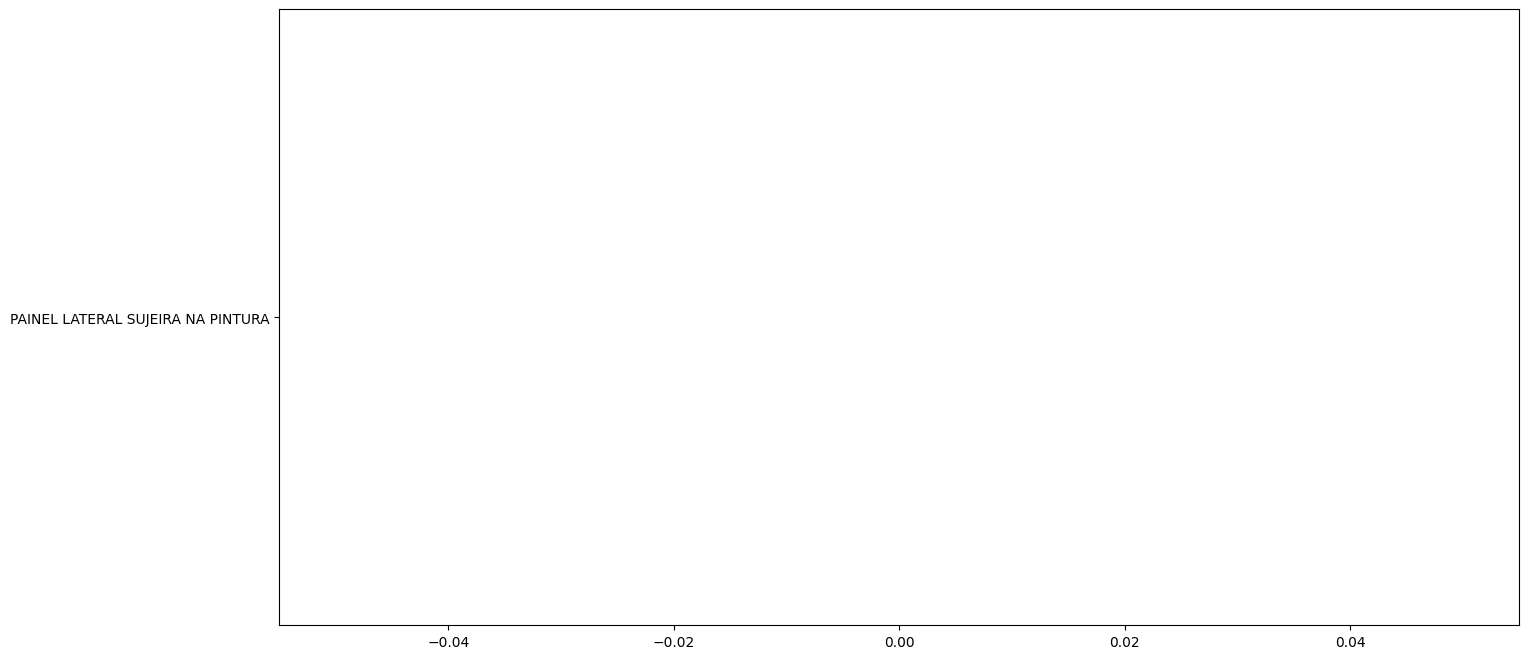

In [242]:
plt.figure(figsize=(16, 8))

order = df_falhas_predict['FALHA'].value_counts().nlargest(10).index

# Plotando o gráfico
sns.countplot(data=df_falhas_predict, y='FALHA', order=order)
plt.title('Tipos de falha por veículo')
plt.xlabel('Quantidade de veículos')
plt.ylabel('Falhas')
plt.show()

AttributeError: module 'numpy' has no attribute 'matrix'

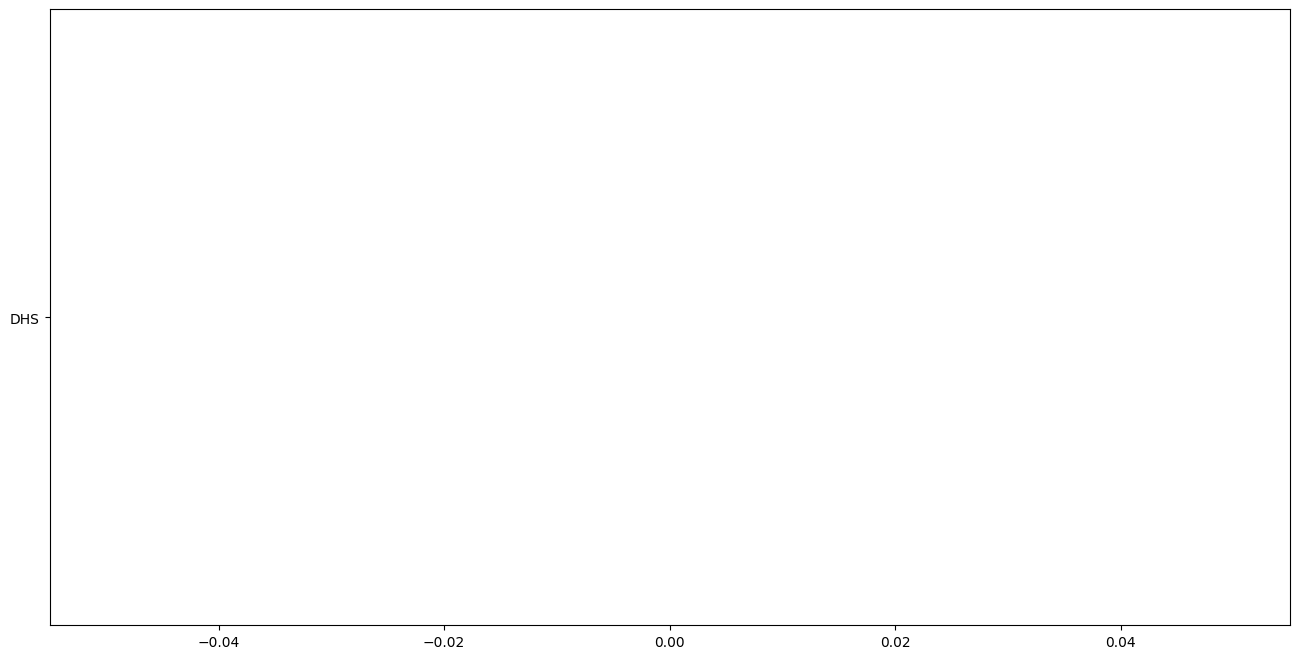

In [243]:
plt.figure(figsize=(16, 8))

order = df_falhas_predict['MOTOR'].value_counts().nlargest(4).index

sns.countplot(data=df_falhas_predict, y='MOTOR', order=order)
plt.title('Tipos de falha por motor')
plt.xlabel('Quantidade de falhas')
plt.ylabel('Falhas')
plt.show()

In [244]:
df_falhas_predict['KNR'].describe()

count           660808
unique           82662
top       2024-1176001
freq                76
Name: KNR, dtype: object

AttributeError: module 'numpy' has no attribute 'matrix'

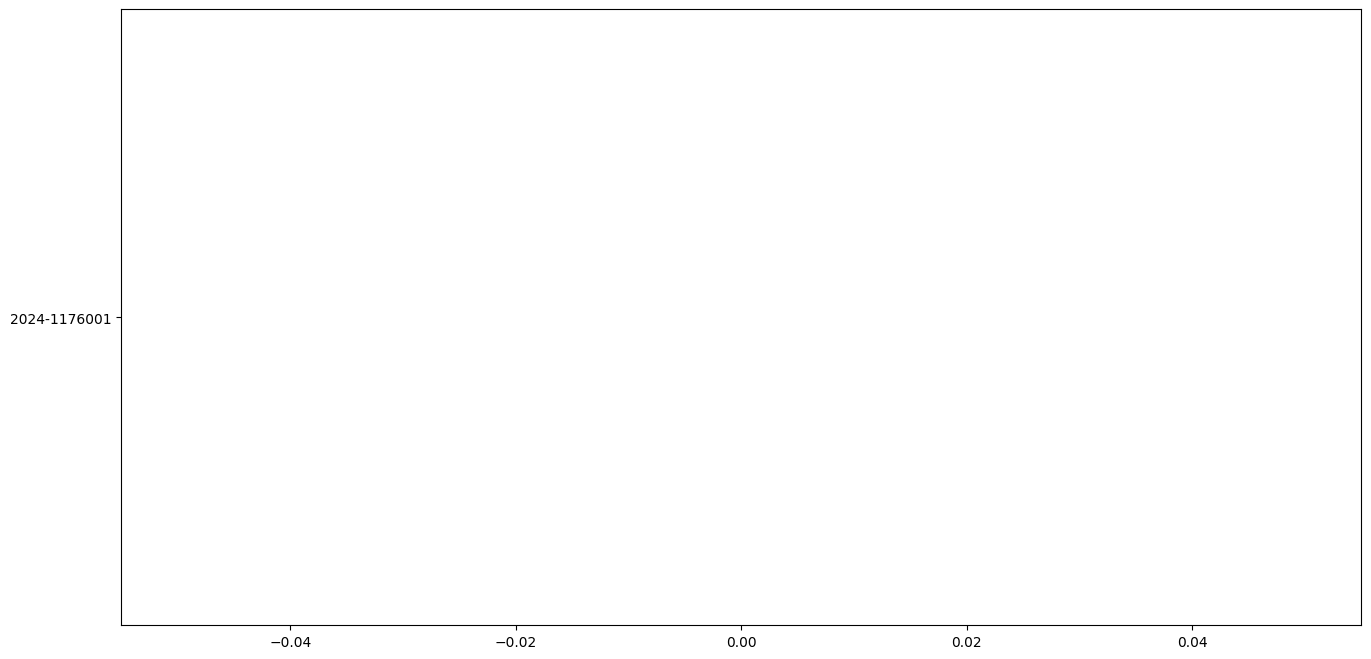

In [245]:
plt.figure(figsize=(16, 8))

order = df_falhas_predict['KNR'].value_counts().nlargest(20).index

# Plotando o gráfico
sns.countplot(data=df_falhas_predict, y='KNR', order=order)
plt.title('Quantidade de falhas por KNR')
plt.xlabel('Quantidade de falhas')
plt.ylabel('KNR')
plt.show()

In [246]:
media_de_falhas_por_knr = df_falhas_predict['KNR'].value_counts().mean()
print("Média de falhas por KNR:", media_de_falhas_por_knr)

Média de falhas por KNR: 7.994096440928117


In [247]:
df_falhas_predict['COR'].value_counts()

COR
K2K2    149536
2R2R    146538
0Q0Q    145177
A1A1     81452
5T5T     51426
2RA1     19964
K2A1     17858
0QA1     13815
8E8E     12633
6K6K     11384
5TA1      3790
6KA1      3438
0E0E       996
6Y6Y       893
Z7Z7       456
2D2D       357
8EA1       342
2Y2Y       259
6UA1       195
Z9Z9       128
6U6U        43
N6N6        34
Y1Y1        30
B1B1        29
T9T9        24
M9M9        11
Name: count, dtype: int64

In [248]:
df_falhas_predict['COR'].describe()

count     660808
unique        26
top         K2K2
freq      149536
Name: COR, dtype: object